#### EDA Switzerland Games

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('switzerland_final.csv')

In [108]:
df

,Unnamed: 0,Player1_Name,Player1_Height,Tournament,Location,Ground,Prize,GameRound,Player2_Rank,Num_Sets,TotalPoints,Start_Date,End_Date,Tornament_Days,GameId,Player2_Name,Player2_Height,Player1_Rank,Rank_Diff
0,0,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 16,64,2,15,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Lukasz Kubot,191,1,63
1,1,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1308100.0,Round of 32,47,3,30,2011-10-31,2011-11-06,6,"Basel_Basel, Switzerland_Hard_1308100.0_Round ...",Xavier Malisse,185,1,46
2,2,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Semi-Finals,32,2,23,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Semi-F...",Viktor Troicki,193,3,29
3,3,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Quarter-Finals,66,2,17,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Quarte...",Robin Haase,191,3,63
4,4,Novak Djokovic,188,Basel,"Basel, Switzerland",Hard,1225000.0,Round of 32,26,2,18,2010-11-01,2010-11-07,6,"Basel_Basel, Switzerland_Hard_1225000.0_Round ...",Ernests Gulbis,191,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,4922,Juan Manuel Benitez Chavarriaga,184,Switzerland F3,"Collonge-Bellerive, Switzerland",Clay,15000.0,Round of 16,1011,2,18,2017-08-14,2017-08-20,6,"Switzerland F3_Collonge-Bellerive, Switzerland...",Loic Perret,188,646,365
4923,4923,Marvin Moeller,178,M25 Trimbach,"Trimbach, Switzerland",Carpet,25000.0,Round of 32,1298,3,28,2021-03-08,2021-03-14,6,"M25 Trimbach_Trimbach, Switzerland_Carpet_2500...",Patrik Hartmeier,184,614,684
4924,4924,Marvin Moeller,178,Switzerland F5,"Sion, Switzerland",Clay,15000.0,Round of 32,545,3,29,2017-08-28,2017-09-03,6,"Switzerland F5_Sion, Switzerland_Clay_15000.0_...",Pascal Meis,180,1128,583
4925,4925,Maxence Beauge,183,Switzerland F3,"Collonge-Bellerive, Switzerland",Clay,15000.0,Round of 32,941,2,20,2017-08-14,2017-08-20,6,"Switzerland F3_Collonge-Bellerive, Switzerland...",Issei Okamura,170,1325,384


In [109]:
df['Height_Diff'] = abs(df["Player1_Height"] - df["Player2_Height"])

In [110]:
variables = ['Player1_Height', 'Prize', 'Num_Sets', 'Tornament_Days', 'Player2_Height', 'Rank_Diff','Height_Diff']

In [111]:
correlation_matrix = df[variables].corr()

In [112]:
correlation_matrix

,Player1_Height,Prize,Num_Sets,Tornament_Days,Player2_Height,Rank_Diff,Height_Diff
Player1_Height,1.000000,0.073945,-0.005621,-0.001424,0.013240,-0.011879,-0.525619
Prize,0.073945,1.000000,0.015180,-0.139117,0.087173,-0.297244,-0.034307
Num_Sets,-0.005621,0.015180,1.000000,0.005560,0.002495,-0.083539,0.010183
Tornament_Days,-0.001424,-0.139117,0.005560,1.000000,-0.003901,0.070784,0.002010
Player2_Height,0.013240,0.087173,0.002495,-0.003901,1.000000,-0.061219,-0.692581
Rank_Diff,-0.011879,-0.297244,-0.083539,0.070784,-0.061219,1.000000,0.022876
Height_Diff,-0.525619,-0.034307,0.010183,0.002010,-0.692581,0.022876,1.000000


KeyError: 4

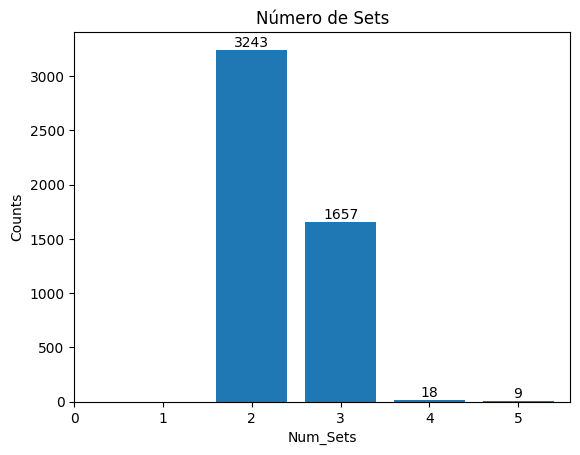

In [113]:
sets_count = df.groupby('Num_Sets').size().reset_index(name='Counts')
plt.bar(sets_count['Num_Sets'], sets_count['Counts'])

for i in range(len(df)):
    plt.text(sets_count['Num_Sets'][i], sets_count['Counts'][i], str(sets_count['Counts'][i]), ha='center', va='bottom')
    plt.xlabel('Num_Sets')
    plt.xticks(range(0, 6, 1))
    plt.ylabel('Counts')
    plt.title('Número de Sets')
plt.show()
sets_count

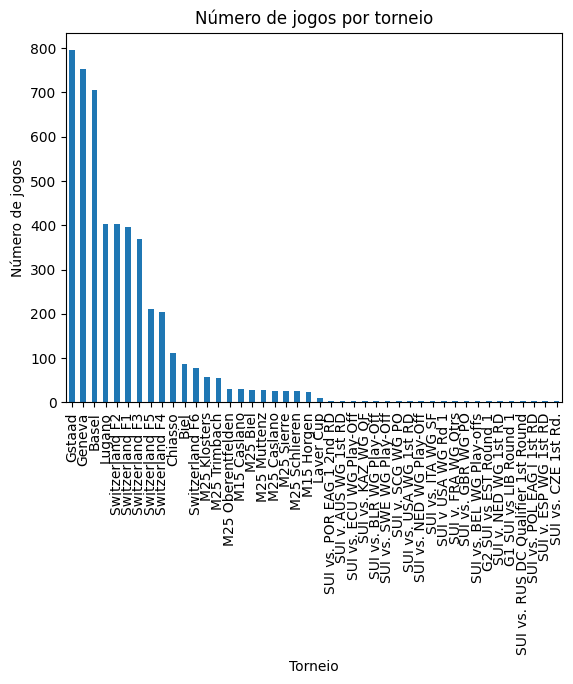

Gstaad                                795
Geneva                                754
Basel                                 705
Lugano                                403
Switzerland F2                        402
Switzerland F1                        397
Switzerland F3                        370
Switzerland F5                        211
Switzerland F4                        204
Chiasso                               111
Biel                                   86
Switzerland F6                         77
M25 Klosters                           58
M25 Trimbach                           55
M25 Oberentfelden                      30
M15 Caslano                            30
M25 Biel                               28
M25 Muttenz                            27
M25 Caslano                            26
M25 Sierre                             26
M25 Schlieren                          25
M15 Horgen                             23
Laver Cup                               9
SUI vs. POR EAG 1 2nd RD          

In [121]:
counts = df['Tournament'].value_counts()

# Cria um gráfico de barras
counts.plot(kind='bar')

# Adiciona rótulos aos eixos e um título ao gráfico
plt.xlabel('Torneio')
plt.ylabel('Número de jogos')
plt.title('Número de jogos por torneio')

# Mostra o gráfico na tela
plt.show()

counts